## EDA of the dataset and merging two datasets provided

## Author: Mitodru Niyogi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_reserve = pd.read_csv('../data/reservations.csv')
df_vehicles = pd.read_csv('../data/vehicles.csv')

In [3]:
df_reserve.head()

,vehicle_id,reservation_type
0,208,1
1,601,3
2,993,1
3,423,2
4,685,3


In [4]:
df_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   vehicle_id        6376 non-null   int64
 1   reservation_type  6376 non-null   int64
dtypes: int64(2)
memory usage: 99.8 KB


array([[<Axes: title={'center': 'vehicle_id'}>,
        <Axes: title={'center': 'reservation_type'}>]], dtype=object)

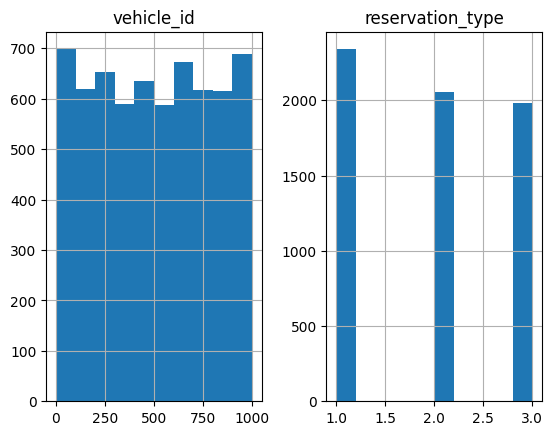

In [14]:
df_reserve.hist()

In [5]:
df_reserve.nunique()

vehicle_id          911
reservation_type      3
dtype: int64

In [6]:
df_reserve.shape

(6376, 2)

In [7]:
df_reserve[df_reserve['vehicle_id']==13]

,vehicle_id,reservation_type


In [8]:
df_vehicles.shape

(1000, 7)

In [9]:
df_vehicles.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description
0,1,1,67.85,59,5,0,7
1,2,0,100.70,53,5,0,224
2,3,0,74.00,74,4,1,21
3,4,0,135.00,75,1,0,184
4,5,0,59.36,53,2,1,31


In [10]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_id         1000 non-null   int64  
 1   technology         1000 non-null   int64  
 2   actual_price       1000 non-null   float64
 3   recommended_price  1000 non-null   int64  
 4   num_images         1000 non-null   int64  
 5   street_parked      1000 non-null   int64  
 6   description        1000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [11]:
df_vehicles.nunique()

vehicle_id           1000
technology              2
actual_price          835
recommended_price      56
num_images              5
street_parked           2
description           236
dtype: int64

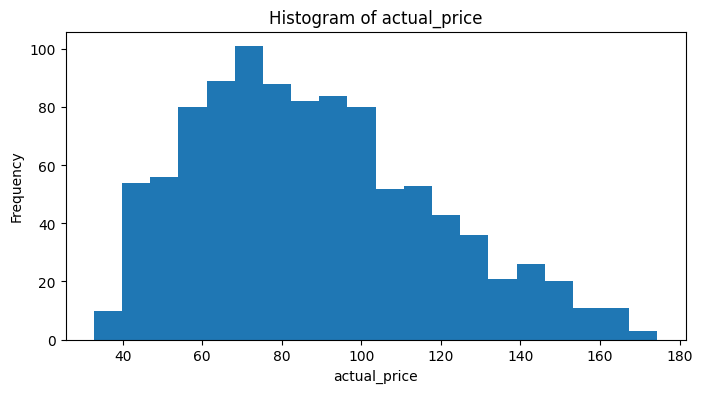

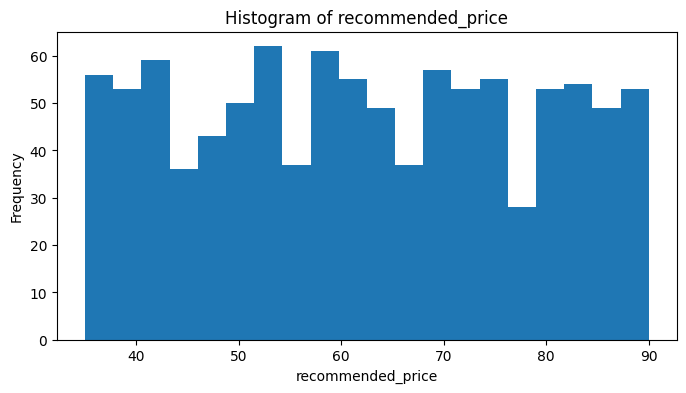

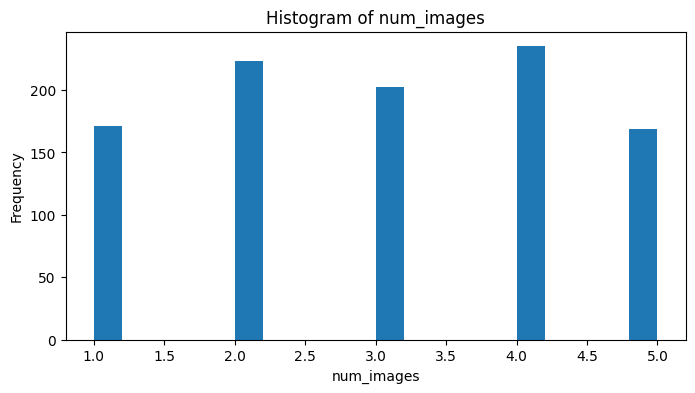

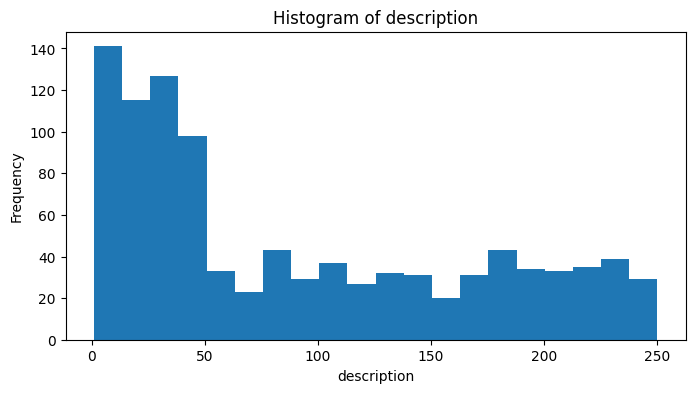

In [16]:
# Plot histograms of numerical variables
numerical_vars = ['actual_price', 'recommended_price', 'num_images', 'description']

for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    plt.hist(df_vehicles[var], bins=20)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    plt.show()


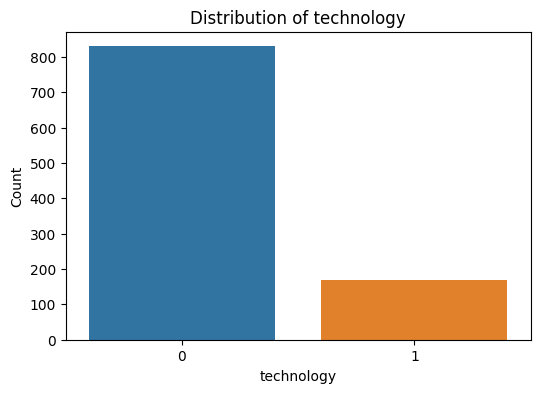

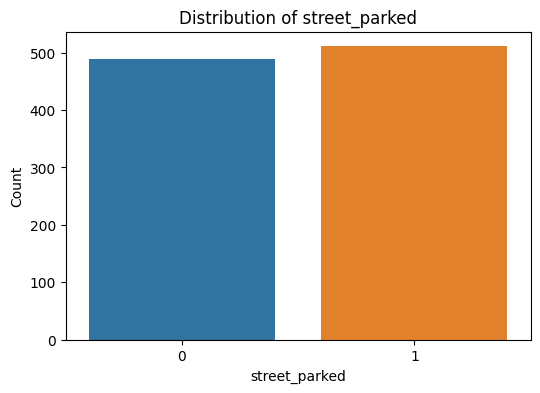

In [17]:
import seaborn as sns

# Plot the distribution of categorical variables
categorical_vars = ['technology', 'street_parked']

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_vehicles, x=var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Distribution of {var}')
    plt.show()


## From df_reserve and df_vehicles, we observe that there are 911 unique vehicles that were booked out of 1000 unique vehicles. Therefore, there are 89 vehicles in the dataset that were never booked.

## Now, lets see for which vehicles in the dataset that were not booked at all

In [18]:
# Concatenate the two columns into a single DataFrame
concatenated = pd.concat([df_reserve['vehicle_id'], df_vehicles['vehicle_id']])

# Get the non-intersecting values
non_intersecting_vehicles = concatenated[~concatenated.duplicated(keep=False)]

In [19]:
non_intersecting_vehicles

6        7
12      13
32      33
44      45
85      86
      ... 
968    969
971    972
972    973
973    974
991    992
Name: vehicle_id, Length: 89, dtype: int64

In [20]:
len(non_intersecting_vehicles)

89

In [21]:
non_intersecting_vehicles.reset_index()

,index,vehicle_id
0,6,7
1,12,13
2,32,33
3,44,45
4,85,86
...,...,...
84,968,969
85,971,972
86,972,973
87,973,974


In [22]:
# Merge the datasets on vehicle_id
data = pd.merge(df_vehicles, df_reserve, on='vehicle_id', how='outer')


In [23]:
data.shape

(6465, 8)

In [24]:
data[data['vehicle_id']==7]

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_type
42,7,0,165.17,83,3,0,32,NaN


### After having an outer join, we can see that the reservation_type for the vehicle that was never booked has been set to NaN

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6465 entries, 0 to 6464
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_id         6465 non-null   int64  
 1   technology         6465 non-null   int64  
 2   actual_price       6465 non-null   float64
 3   recommended_price  6465 non-null   int64  
 4   num_images         6465 non-null   int64  
 5   street_parked      6465 non-null   int64  
 6   description        6465 non-null   int64  
 7   reservation_type   6376 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 404.2 KB


In [26]:
data.nunique()

vehicle_id           1000
technology              2
actual_price          835
recommended_price      56
num_images              5
street_parked           2
description           236
reservation_type        3
dtype: int64

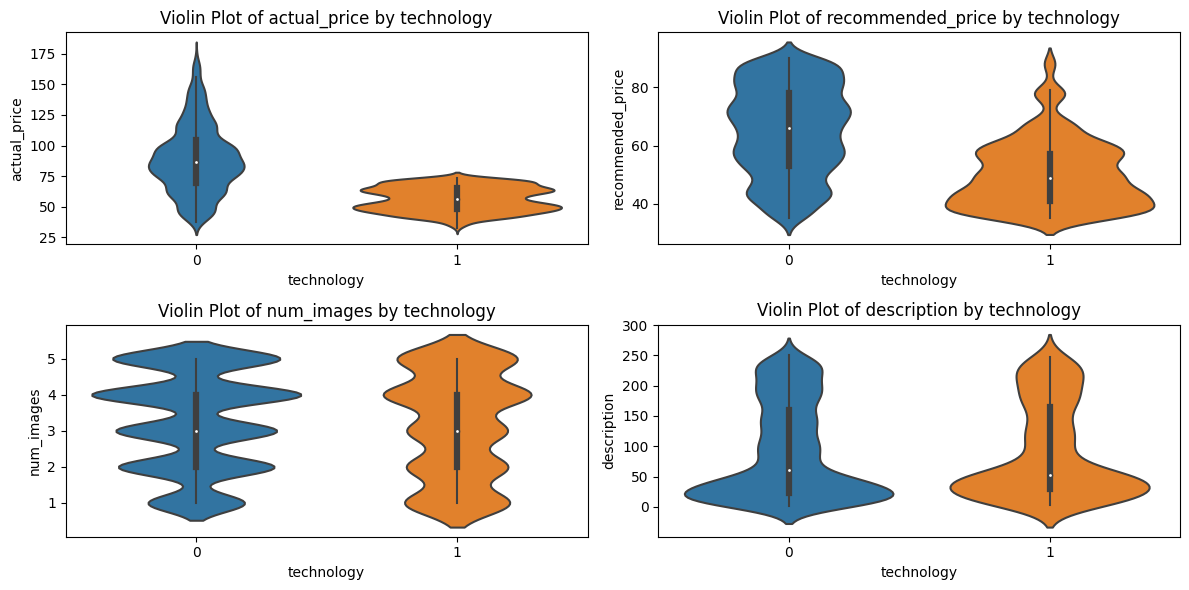

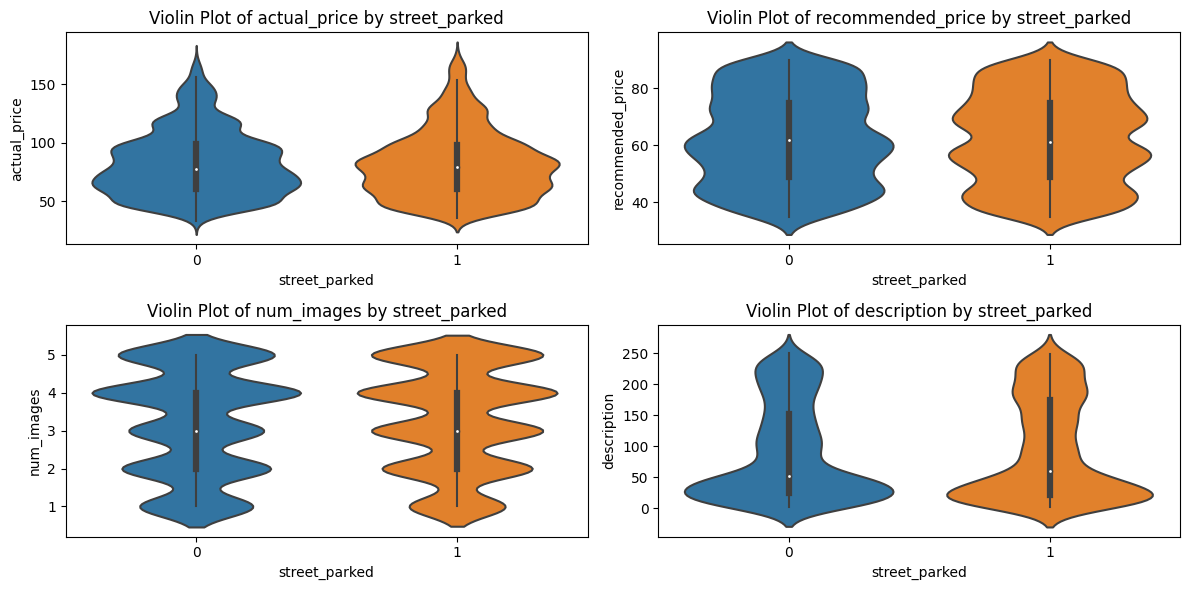

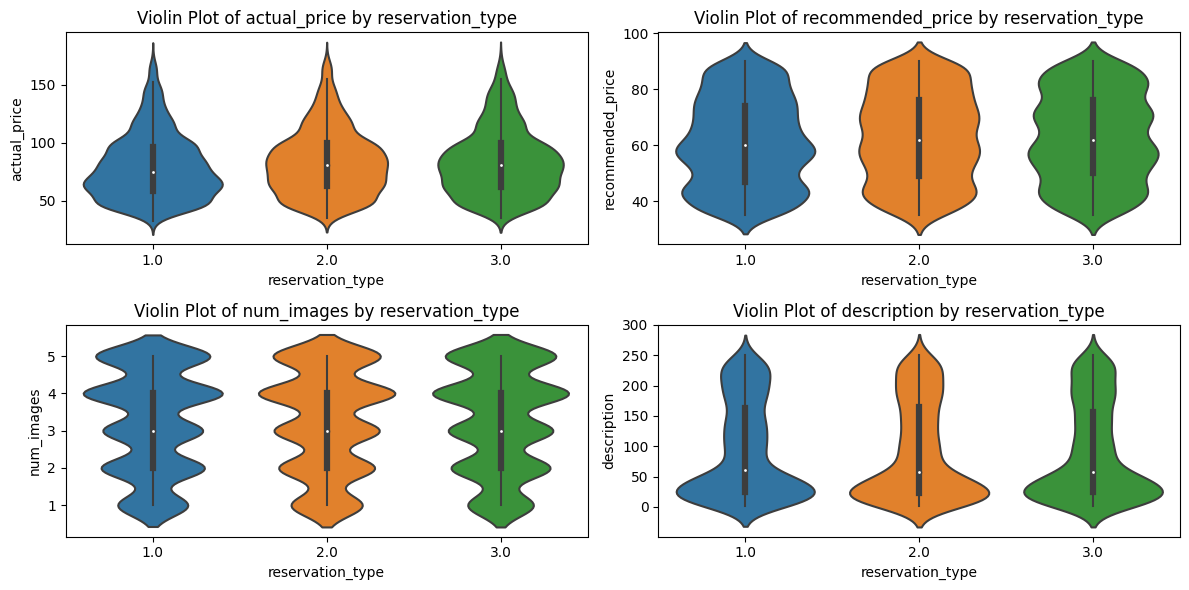

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical and categorical features
numerical_features = ['actual_price', 'recommended_price', 'num_images', 'description']
categorical_features = ['technology', 'street_parked', 'reservation_type']

# Plot the violin plots
for cat_feature in categorical_features:
    plt.figure(figsize=(12, 6))
    for num_feature in numerical_features:
        plt.subplot(2, 2, numerical_features.index(num_feature) + 1)
        sns.violinplot(data=data, x=cat_feature, y=num_feature)
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.title(f'Violin Plot of {num_feature} by {cat_feature}')
    plt.tight_layout()
    plt.show()


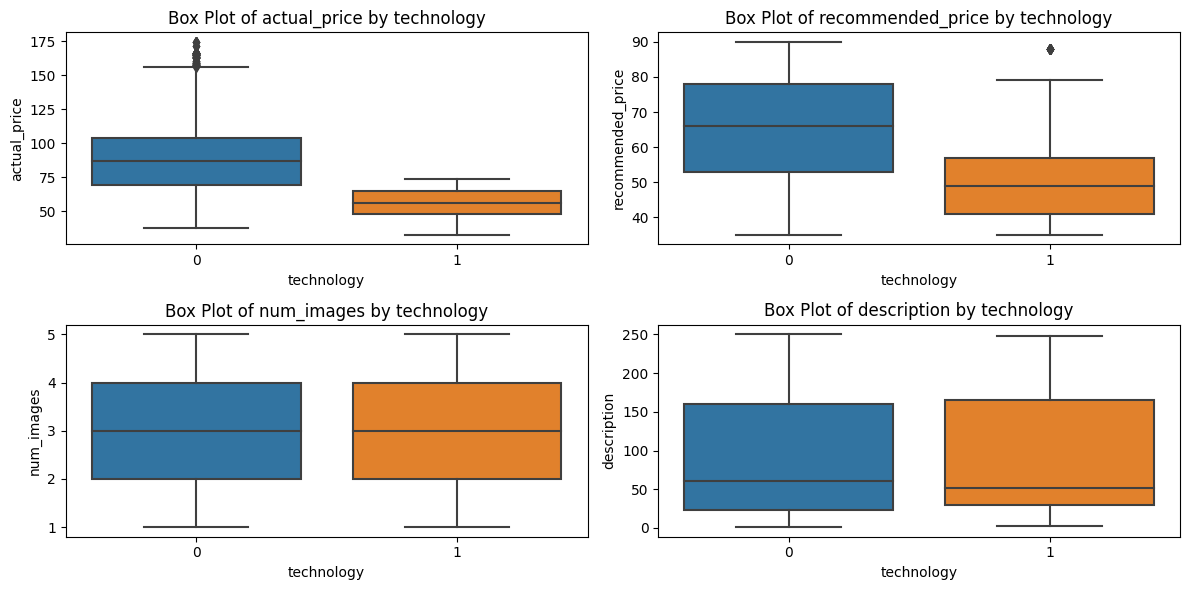

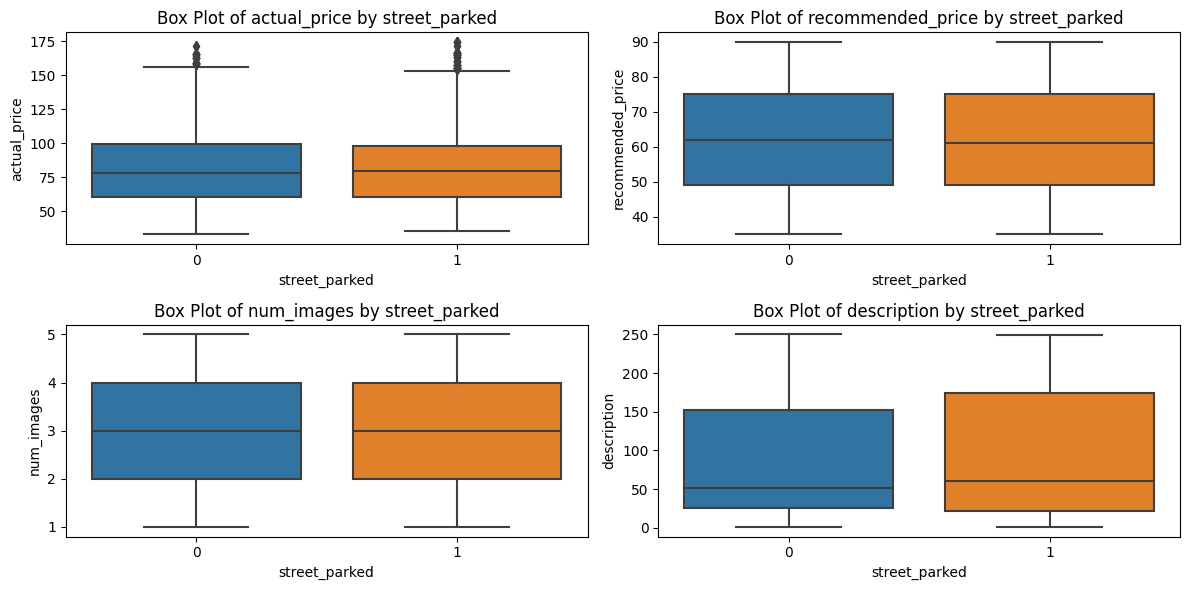

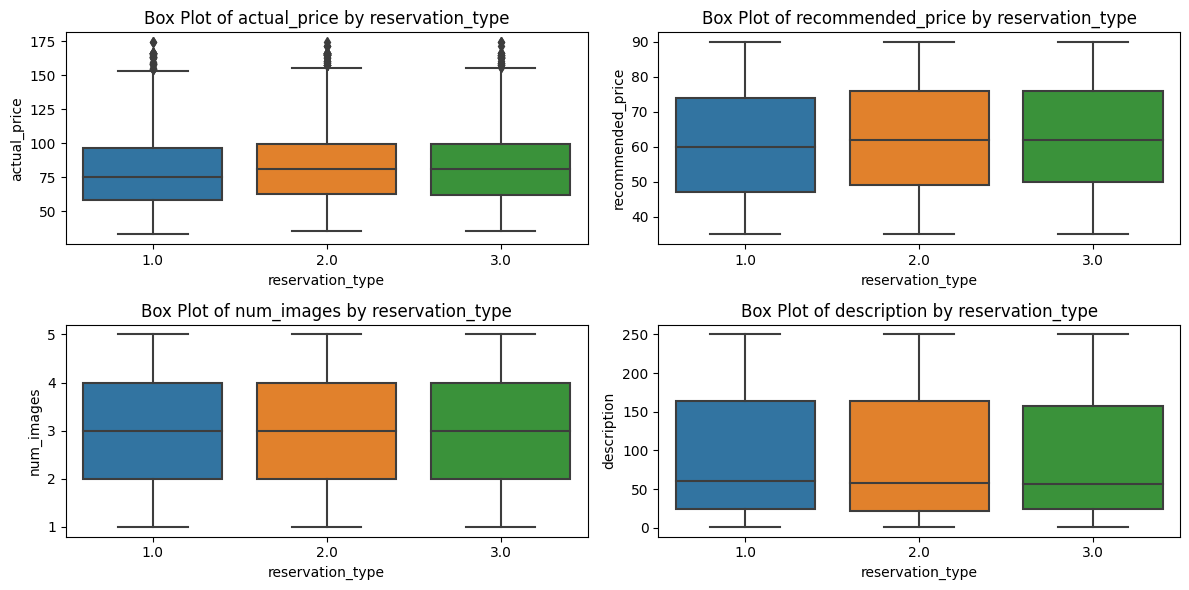

In [33]:
import matplotlib.pyplot as plt

# Select the numerical and categorical features
numerical_features = ['actual_price', 'recommended_price', 'num_images', 'description']
categorical_features = ['technology', 'street_parked', 'reservation_type']

# Plot the violin plots
for cat_feature in categorical_features:
    plt.figure(figsize=(12, 6))
    for num_feature in numerical_features:
        plt.subplot(2, 2, numerical_features.index(num_feature) + 1)
        sns.boxplot(data=data, x=cat_feature, y=num_feature)
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.title(f'Box Plot of {num_feature} by {cat_feature}')
    plt.tight_layout()
    plt.show()


In [34]:
# Group by vehicle_id and reservation_type, and count the number of bookings
reservation_counts = data.groupby(['vehicle_id', 'reservation_type']).size().reset_index(name='num_reservations')


In [35]:
reservation_counts[reservation_counts['vehicle_id']==7]

,vehicle_id,reservation_type,num_reservations


In [36]:
# Merge the reservation counts with the original data based on 'vehicle_id' and 'reservation_type'
data = pd.merge(data, reservation_counts, on=['vehicle_id', 'reservation_type'], how='outer')

In [37]:
data.shape

(6465, 9)

In [38]:
data[data['vehicle_id']==13]

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_type,num_reservations
79,13,0,109.8,60,1,0,40,NaN,NaN


In [39]:
# filling the Nan with zeros
# num_reservations is set to zero which means the vehicle was never booked
data['num_reservations'].fillna(0, inplace=True)

data['reservation_type'].fillna(0, inplace=True)

In [40]:
data.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_type,num_reservations
0,1,1,67.85,59,5,0,7,1.0,1.0
1,2,0,100.70,53,5,0,224,1.0,4.0
2,2,0,100.70,53,5,0,224,1.0,4.0
3,2,0,100.70,53,5,0,224,1.0,4.0
4,2,0,100.70,53,5,0,224,1.0,4.0


In [41]:
data.shape

(6465, 9)

In [42]:
data[data['vehicle_id']==2]

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_type,num_reservations
1,2,0,100.7,53,5,0,224,1.0,4.0
2,2,0,100.7,53,5,0,224,1.0,4.0
3,2,0,100.7,53,5,0,224,1.0,4.0
4,2,0,100.7,53,5,0,224,1.0,4.0
5,2,0,100.7,53,5,0,224,2.0,3.0
6,2,0,100.7,53,5,0,224,2.0,3.0
7,2,0,100.7,53,5,0,224,2.0,3.0


### We can see lots of duplicates after the outer join operation so we need to drop the duplicates from the dataframe

In [43]:
# dropping duplicates from the dataframe
data = data.drop_duplicates()

In [44]:
data.shape

(2371, 9)

In [45]:
data[data['vehicle_id']==2]

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_type,num_reservations
1,2,0,100.7,53,5,0,224,1.0,4.0
5,2,0,100.7,53,5,0,224,2.0,3.0


In [46]:
data.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_type,num_reservations
0,1,1,67.85,59,5,0,7,1.0,1.0
1,2,0,100.70,53,5,0,224,1.0,4.0
5,2,0,100.70,53,5,0,224,2.0,3.0
8,3,0,74.00,74,4,1,21,2.0,9.0
17,3,0,74.00,74,4,1,21,1.0,1.0


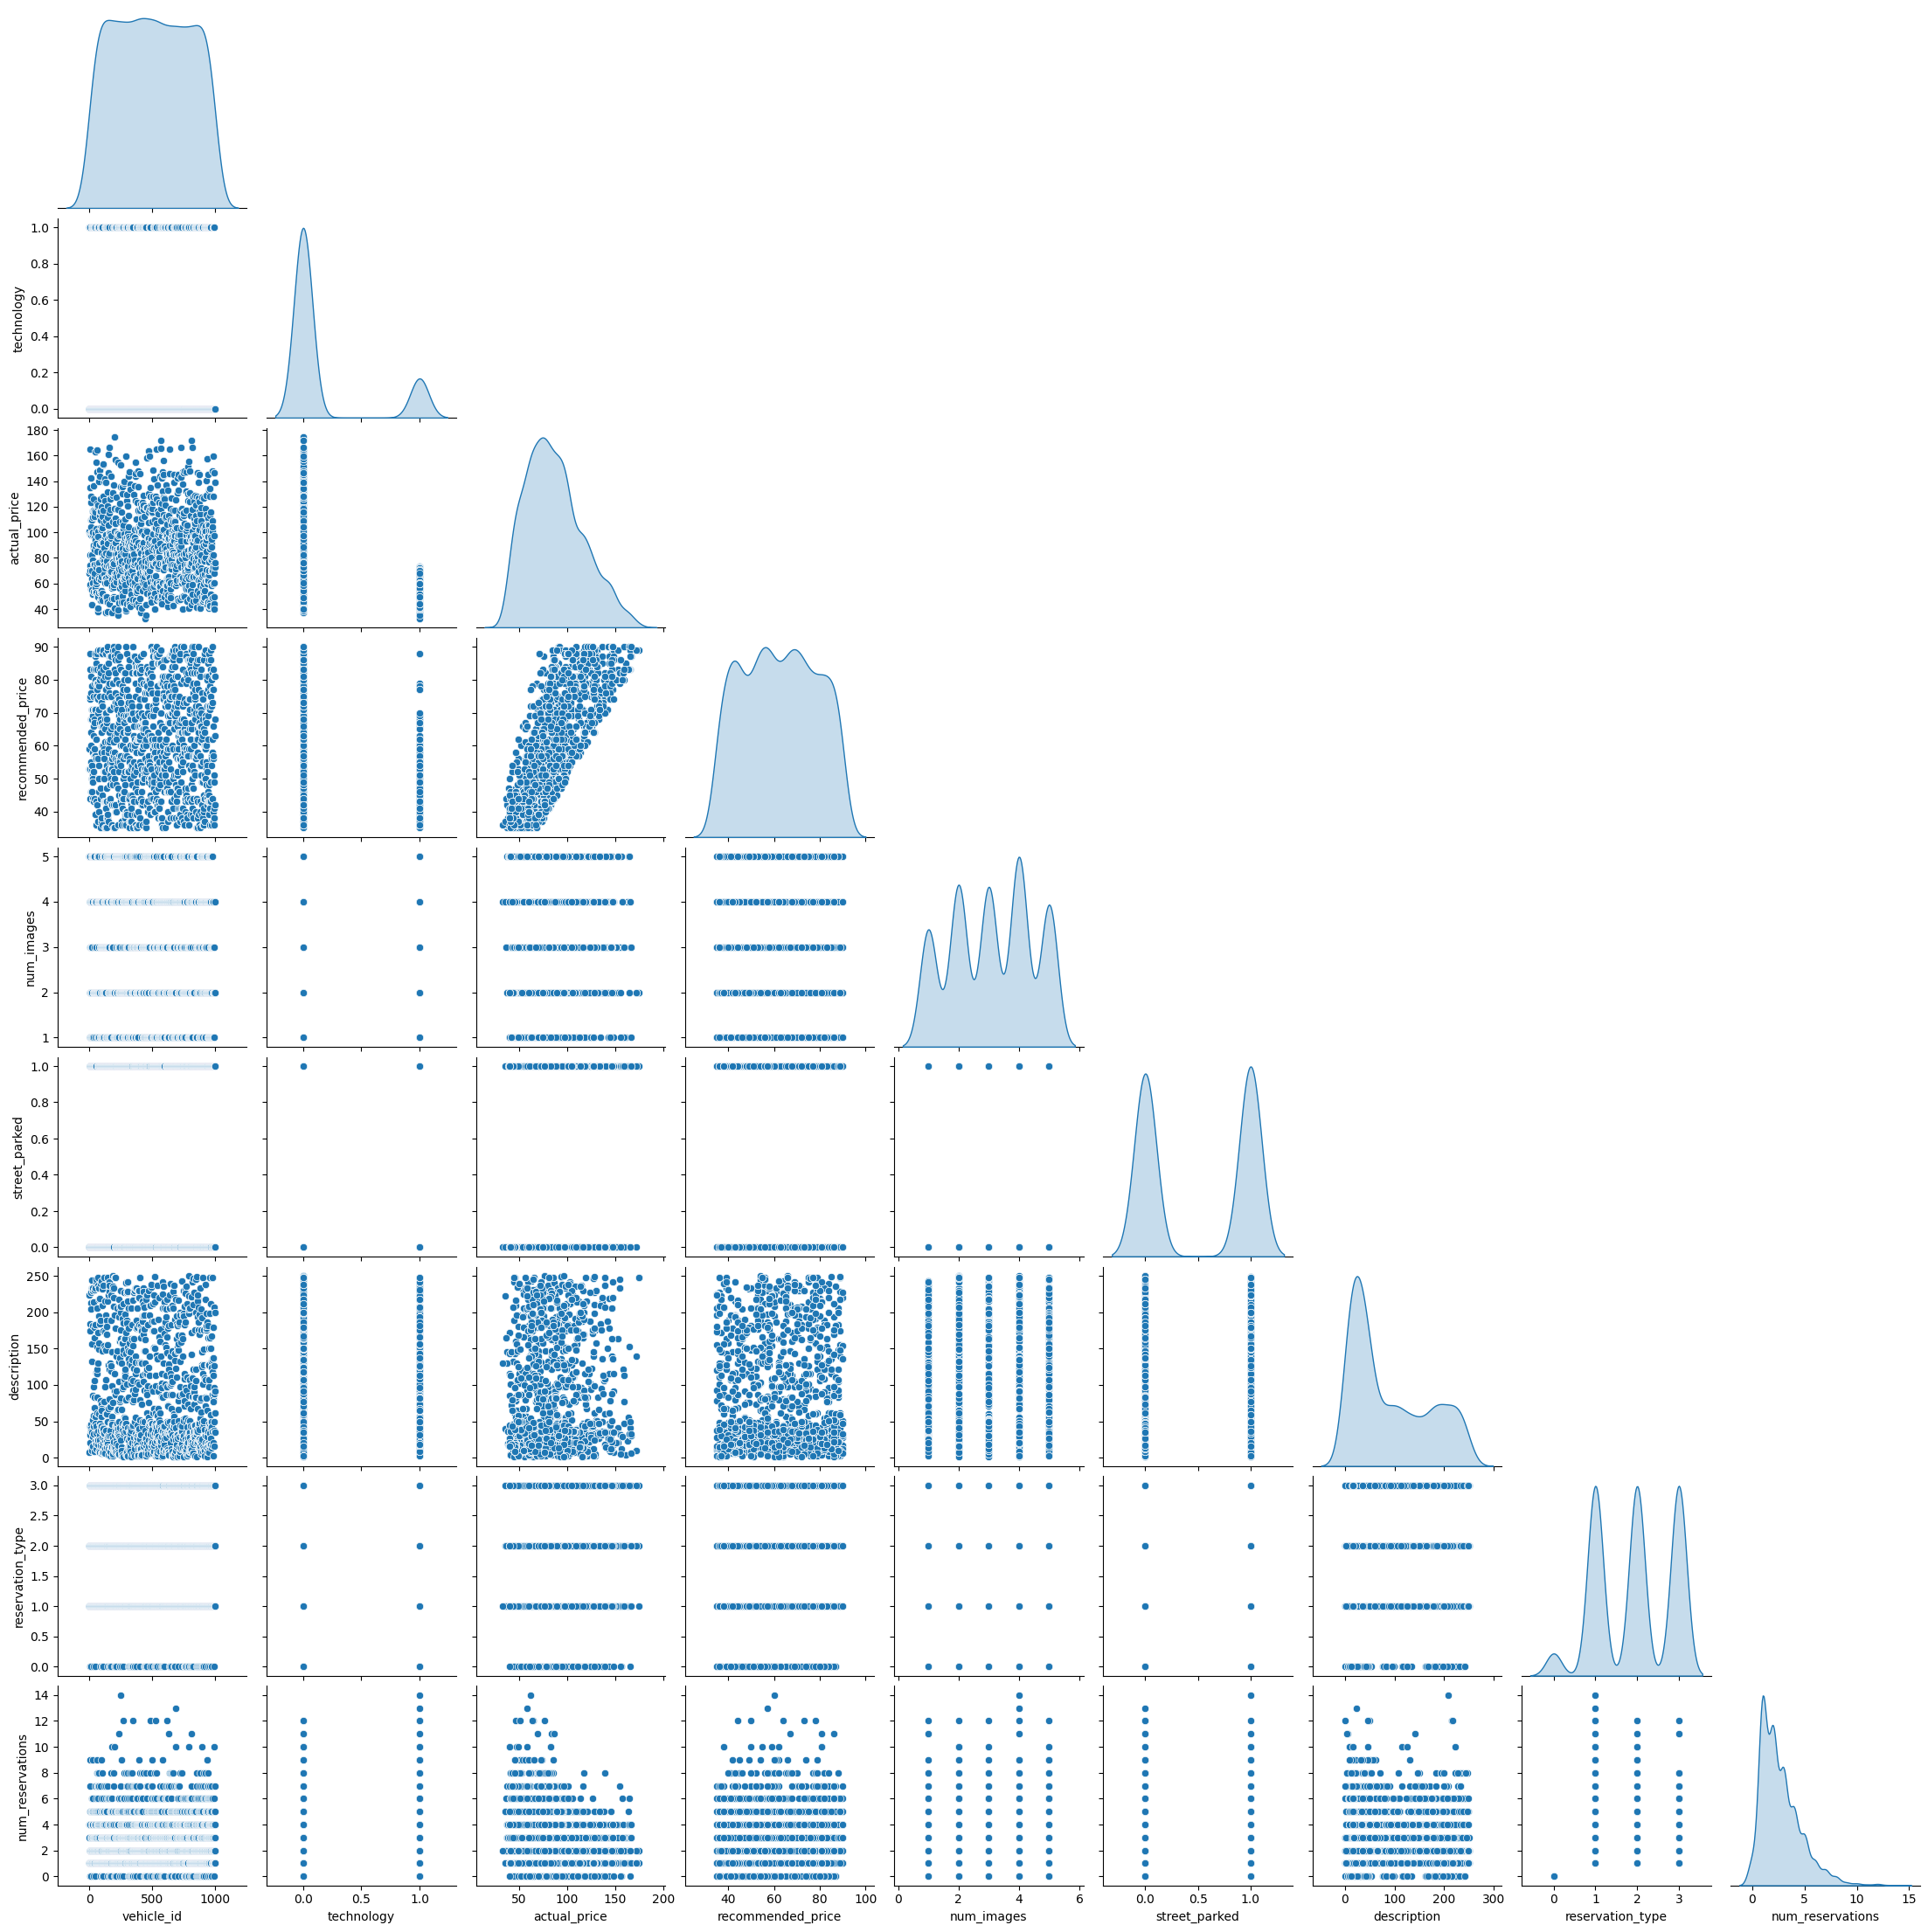

In [47]:
grid = sns.pairplot(data, diag_kind="kde", corner=True)

In [48]:
numerical_feat = ['vehicle_id', 'actual_price', 'recommended_price', 'num_images', 'description', 'num_reservations']
data[numerical_feat].corr()

,vehicle_id,actual_price,recommended_price,num_images,description,num_reservations
vehicle_id,1.000000,-0.019845,-0.000644,-0.022471,-0.062052,0.010882
actual_price,-0.019845,1.000000,0.752840,-0.030882,-0.007780,-0.224669
recommended_price,-0.000644,0.752840,1.000000,-0.038375,0.021807,-0.022006
num_images,-0.022471,-0.030882,-0.038375,1.000000,0.014194,0.139371
description,-0.062052,-0.007780,0.021807,0.014194,1.000000,0.016685
num_reservations,0.010882,-0.224669,-0.022006,0.139371,0.016685,1.000000


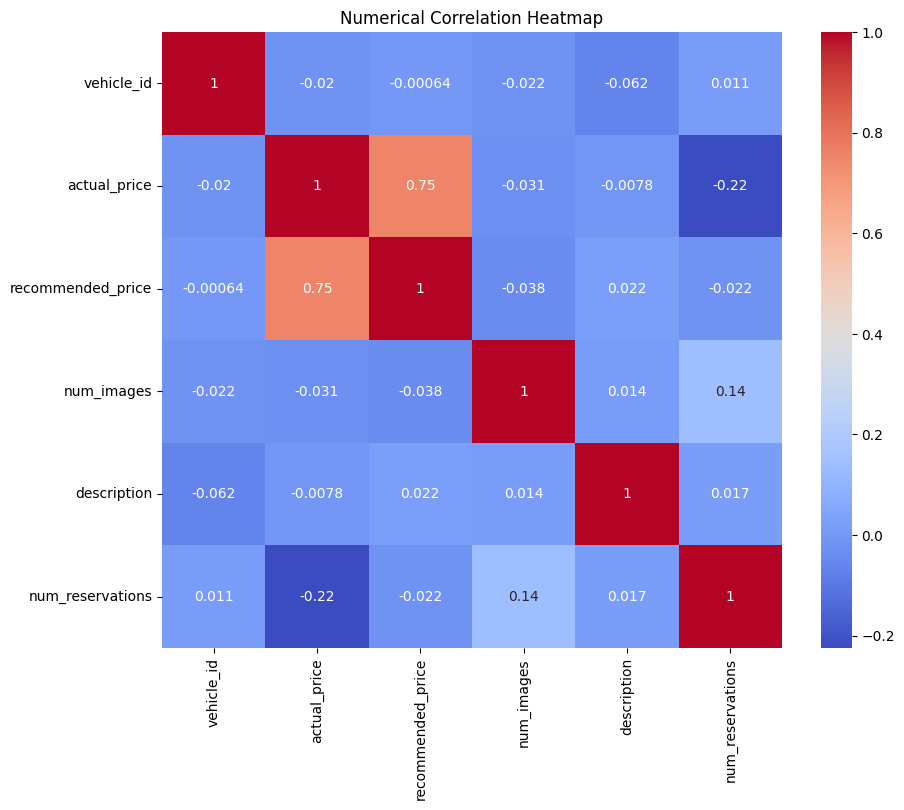

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_feat].corr(), annot=True, cmap='coolwarm')
plt.title('Numerical Correlation Heatmap')
plt.show()